In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
df = pd.read_csv('Global_Data.csv')
corr_matrix = df.corr()

In [33]:
start_date = '02-01-2018'
end_date = '29-07-2022'

start_date = pd.to_datetime(start_date, format='%d-%m-%Y')
end_date = pd.to_datetime(end_date, format='%d-%m-%Y')

In [34]:
date_range = pd.date_range(start=start_date,periods=len(df),  freq='D')

In [35]:
df.insert(0, 'Date', date_range)


In [7]:
df.apply(pd.isnull).sum()

Date            0
BTC           245
ETH           245
USDT            3
XRP           245
USA           462
CAN           462
UK            461
FRANCE        461
SWISS         461
GERM          461
BRAZIL        462
MEX           462
CHILE         462
PERU          462
COLOMBIA      462
SAUDI         461
SAFRICA       462
UAE           231
QATAR         231
KUWAIT        231
JAPAN         460
CHINA         460
AUSTRALIA     461
TAIWAN        460
KOREA         460
REIT          460
DXY           462
ENERGY        500
AGRI          500
PRECIOUS      500
INDUSTRIAL    500
SUKUK         467
SUSTAIN       461
GREENB        463
dtype: int64

In [36]:
df_filled = df.interpolate()

In [37]:
column_names = df_filled.columns
df= df_filled

In [38]:
df.head()

,Date,BTC,ETH,USDT,XRP,USA,CAN,UK,FRANCE,SWISS,...,KOREA,REIT,DXY,ENERGY,AGRI,PRECIOUS,INDUSTRIAL,SUKUK,SUSTAIN,GREENB
0,2018-01-02,13444.900000,752.46,1.010000,2.050000,2544.580,1791.593,1255.807,1939.395,5503.285,...,554.164,1588.421373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-03,14754.100000,858.78,1.020000,2.190000,2565.608,1807.276,1254.183,1938.353,5516.304,...,561.255,1581.589857,91.872,210.06,284.50,1725.27,393.92,127.32,1526.41,138.02
2,2018-01-04,15156.600000,942.01,1.010000,2.730000,2582.160,1811.935,1251.570,1949.120,5538.526,...,562.856,1582.679676,92.162,213.70,285.10,1728.73,389.68,127.44,1533.04,138.09
3,2018-01-05,15180.100000,940.00,1.020000,2.730000,2592.489,1820.338,1259.210,1985.510,5569.269,...,559.932,1561.484702,91.853,214.02,284.69,1732.38,392.93,127.78,1549.34,138.44
4,2018-01-06,15529.466667,998.60,1.012333,2.746667,2610.524,1833.096,1264.804,1999.127,5597.080,...,568.514,1564.553810,91.949,212.03,283.47,1733.37,387.82,127.74,1561.40,138.24


In [39]:
energy = df['ENERGY']

<Axes: >

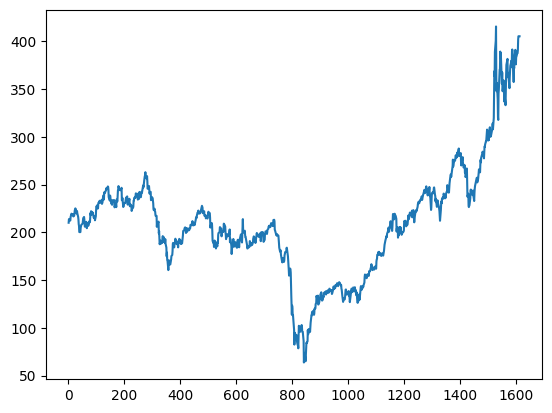

In [40]:
energy.plot()

In [18]:
df.columns

Index(['BTC', 'ETH', 'USDT', 'XRP', 'USA', 'CAN', 'UK', 'FRANCE', 'SWISS',
       'GERM', 'BRAZIL', 'MEX', 'CHILE', 'PERU', 'COLOMBIA', 'SAUDI',
       'SAFRICA', 'UAE', 'QATAR', 'KUWAIT', 'JAPAN', 'CHINA', 'AUSTRALIA',
       'TAIWAN', 'KOREA', 'REIT', 'DXY', 'ENERGY', 'AGRI', 'PRECIOUS',
       'INDUSTRIAL', 'SUKUK', 'SUSTAIN', 'GREENB'],
      dtype='object')

In [41]:
df_selected = df[['Date','ENERGY']]



In [42]:
df_selected

,Date,ENERGY
0,2018-01-02,NaN
1,2018-01-03,210.060
2,2018-01-04,213.700
3,2018-01-05,214.020
4,2018-01-06,212.030
...,...,...
1607,2022-05-28,405.330
1608,2022-05-29,405.325
1609,2022-05-30,405.320
1610,2022-05-31,405.315


In [43]:
df_selected['Date']

0      2018-01-02
1      2018-01-03
2      2018-01-04
3      2018-01-05
4      2018-01-06
          ...    
1607   2022-05-28
1608   2022-05-29
1609   2022-05-30
1610   2022-05-31
1611   2022-06-01
Name: Date, Length: 1612, dtype: datetime64[ns]

In [48]:
import datetime

def str_to_datetime(s):
    if isinstance(s, pd.Timestamp):
        return s
    
    split = s.split('-')
    year, month, day = int(split[0]),int(split[1]),int(split[2])
    
    return datetime.datetime(year=year, month=month, day=day)


In [45]:
datetime_obj = str_to_datetime("2022-05-28")
datetime_obj

datetime.datetime(2022, 5, 28, 0, 0)

In [49]:
df = df_selected

In [50]:
df['Date'] = df['Date'].apply(str_to_datetime)

C:\Users\Sreeram Raghammudi\AppData\Local\Temp\ipykernel_116648\3172778012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


In [52]:
df

,Date,ENERGY
0,2018-01-02,NaN
1,2018-01-03,210.060
2,2018-01-04,213.700
3,2018-01-05,214.020
4,2018-01-06,212.030
...,...,...
1607,2022-05-28,405.330
1608,2022-05-29,405.325
1609,2022-05-30,405.320
1610,2022-05-31,405.315


In [ ]:
df.index = df.pop('Date')

In [55]:
df

,ENERGY
Date,
2018-01-02,NaN
2018-01-03,210.060
2018-01-04,213.700
2018-01-05,214.020
2018-01-06,212.030
...,...
2022-05-28,405.330
2022-05-29,405.325
2022-05-30,405.320


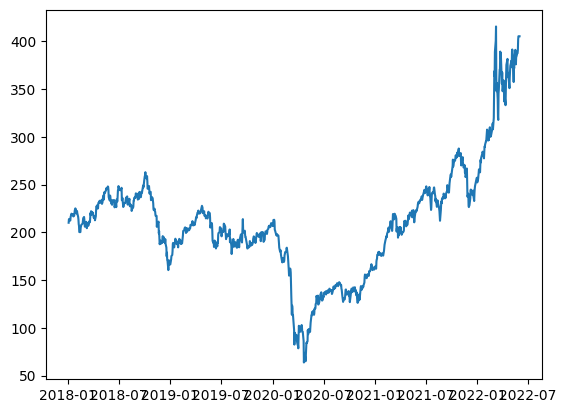

In [56]:
plt.plot(df.index, df['ENERGY'])

In [58]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['ENERGY'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,204.903333,205.180000,194.460000,204.190000
1,2021-03-26,205.180000,194.460000,204.190000,196.550000
2,2021-03-27,194.460000,204.190000,196.550000,204.100000
3,2021-03-28,204.190000,196.550000,204.100000,204.586667
4,2021-03-29,196.550000,204.100000,204.586667,205.073333
...,...,...,...,...,...
359,2022-03-19,320.310000,317.720000,345.430000,349.300000
360,2022-03-20,317.720000,345.430000,349.300000,356.313333
361,2022-03-21,345.430000,349.300000,356.313333,363.326667
362,2022-03-22,349.300000,356.313333,363.326667,370.340000


In [59]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((364,), (364, 3, 1), (364,))

: 